# 图游走类模型

## 课堂内容概览
![](https://ai-studio-static-online.cdn.bcebos.com/801d3a2ab83847b6990c47bccbca29f9c8745f4b664c407c9fd159e85208ceee)


## 课堂实践：生成单条 DeepWalk 游走序列

In [4]:
# 安装依赖
!pip install pgl

Looking in indexes: https://mirror.baidu.com/pypi/simple/


In [1]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import networkx as nx # networkx是一个常用的绘制复杂图形的Python包。

import pgl

### 构建graph

在进行deepwalk游走之前，我们需要构建一个图网络。

图网络的构建需要用到Graph类，Graph类的具体实现可以参考 `PGL/pgl/graph.py`

下面我们简单展示一下如果构建一个图网络：

In [2]:
def build_graph():
    # 定义节点的个数；每个节点用一个数字表示，即从0~9
    num_node = 10
    # 添加节点之间的边，每条边用一个tuple表示为: (src, dst)
    edge_list = [(2, 0), (2, 1), (3, 1),(4, 0), (0, 5), 
             (6, 0), (6, 4), (5, 6), (7, 0), (1, 7),
             (2, 7), (7, 3), (8, 0), (9, 7)]

    g = pgl.graph.Graph(num_nodes = num_node, edges = edge_list)

    return g

# 创建一个图对象，用于保存图网络的各种数据。
g = build_graph()

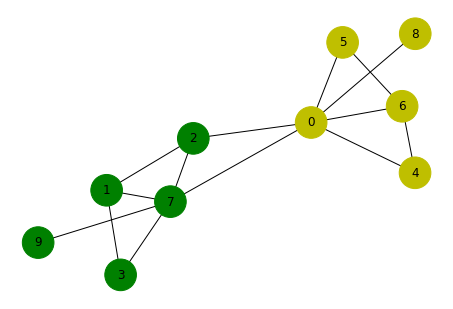

In [9]:
def display_graph(g):
    nx_G = nx.Graph()
    nx_G.add_nodes_from(range(g.num_nodes))
    nx_G.add_edges_from(g.edges)
    
    pos = nx.spring_layout(nx_G, iterations=50)
    
    nx.draw(nx_G, 
            pos,
            with_labels=True,
            node_color=['y','g','g','g','y','y','y','g','y','g'], 
            node_size=1000)

    plt.show()

display_graph(g)

### Deepwalk 采样

对于给定的节点，DeepWalk会等概率的选取下一个相邻节点加入路径，直至达到最大路径长度，或者没有下一个节点可选。

<img src="https://ai-studio-static-online.cdn.bcebos.com/159e470f09bb4e12bae080a4733d46d0861a08e812e643d5b8b7f080b16f2e38" width="85%" height="85%" />

因此, 假如我们想要得到一条walk, 我们需要输入一个graph, 起始节点ID, 游走的深度walk_len。

In [3]:
def deepwalk(graph, start_node, walk_len):
    walk = [start_node] # 初始化游走序列

    for d in range(walk_len): # 最大长度范围内进行采样
        current_node = walk[-1] 
        successors = graph.successor(np.array([current_node])) # graph.successor: 获取当前节点的后继邻居
        print("当前节点: %d" % current_node)
        print("后继邻居", successors[0])
        succ = successors[0]
        if len(succ) == 0:
            break
        next_node = np.random.choice(succ, 1)
        walk.extend(next_node)
        
    return walk

In [4]:
walk = deepwalk(g, 2, 4)
print(walk)

当前节点: 2
后继邻居 [0 1 7]
当前节点: 0
后继邻居 [5]
当前节点: 5
后继邻居 [6]
当前节点: 6
后继邻居 [0 4]
[2, 0, 5, 6, 4]
